In [1]:
import os
from create_skin_mask import createSkinMask
import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import MAX_SIZE

In [2]:
def resize_to_max(img, max_size_value=MAX_SIZE):
    max_size = max(img.shape[0], img.shape[1])
    ratio = max_size_value / max_size
    target_resolution = (int(img.shape[1] * ratio), int(img.shape[0] * ratio))
    resized_image = cv2.resize(img, target_resolution)
    return resized_image

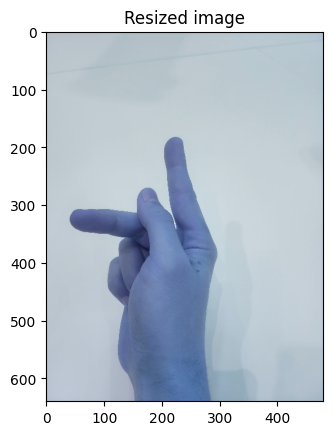

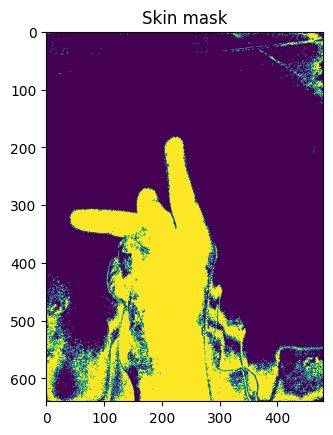

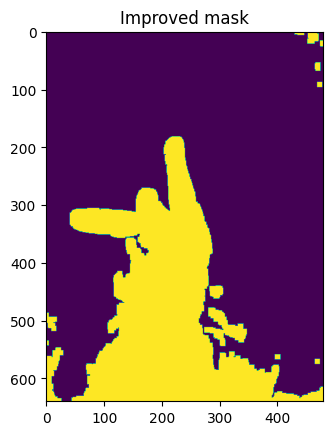

Saving skin mask to data/labels_skin_masks/K.jpg


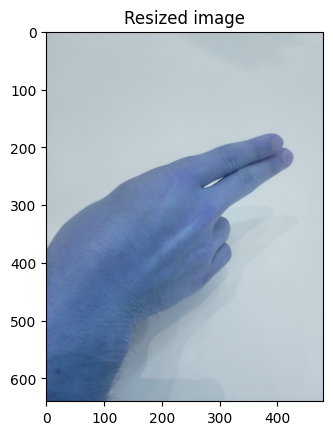

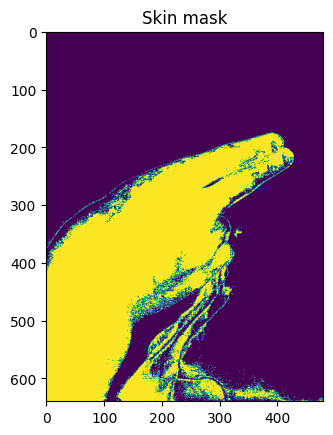

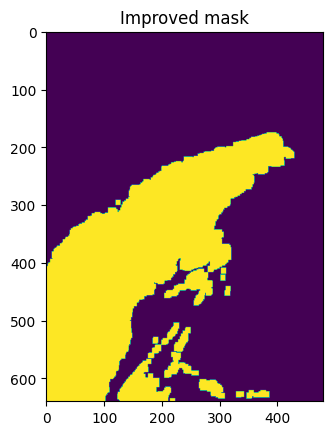

Saving skin mask to data/labels_skin_masks/H.jpg


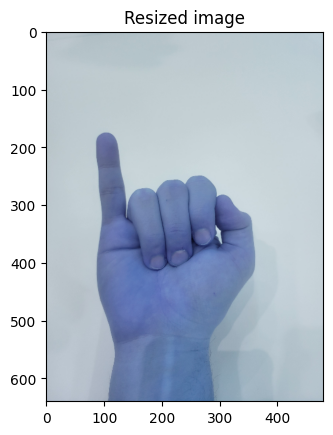

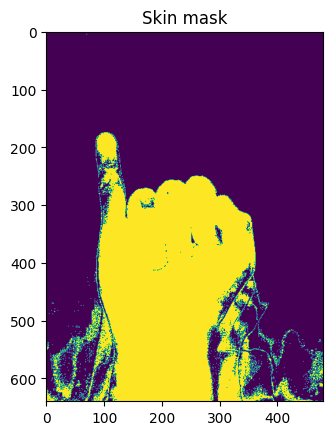

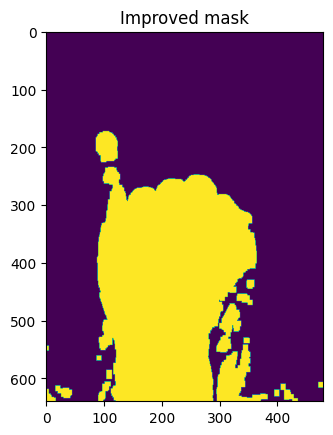

Saving skin mask to data/labels_skin_masks/I.jpg


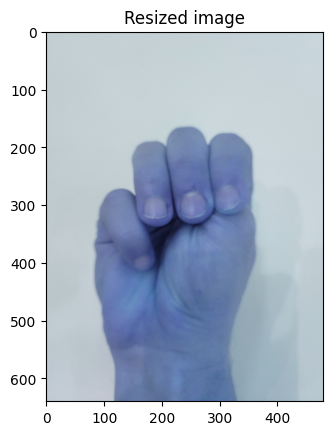

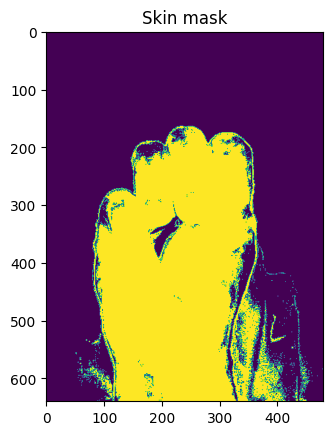

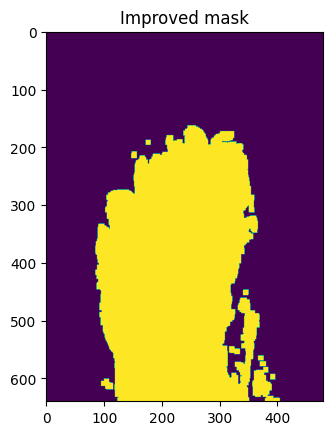

Saving skin mask to data/labels_skin_masks/M.jpg


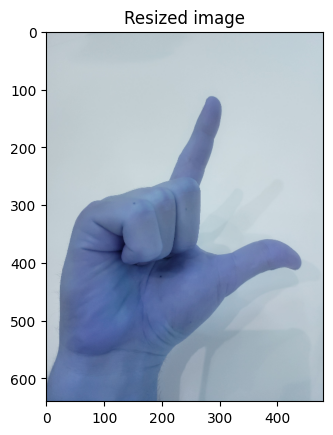

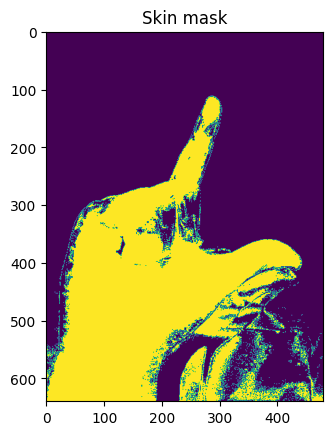

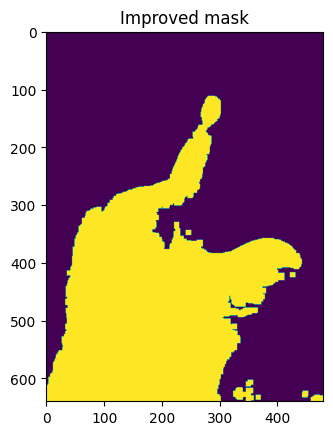

Saving skin mask to data/labels_skin_masks/L.jpg


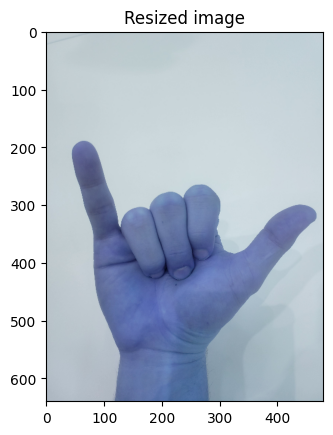

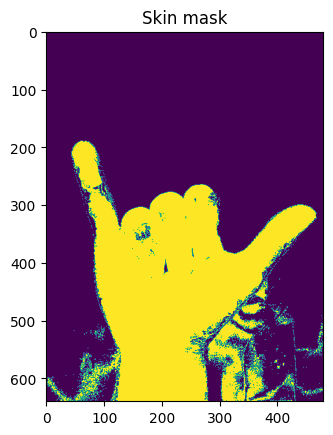

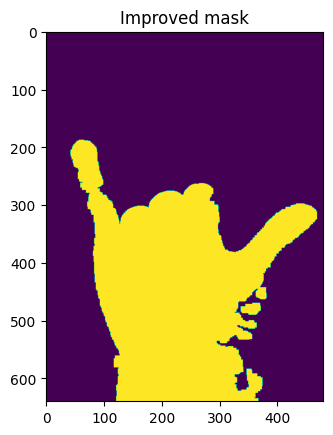

Saving skin mask to data/labels_skin_masks/Y.jpg


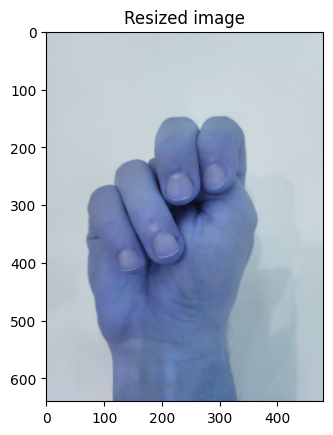

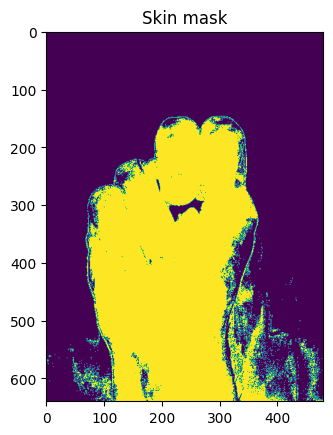

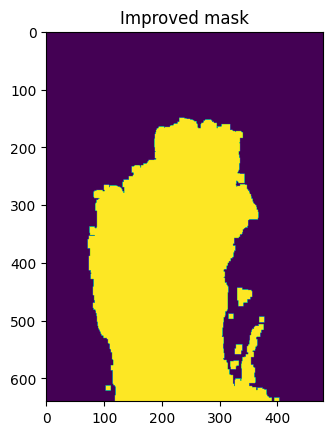

Saving skin mask to data/labels_skin_masks/N.jpg


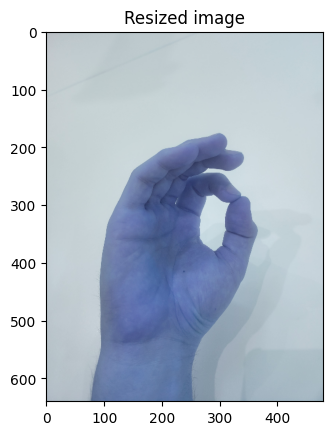

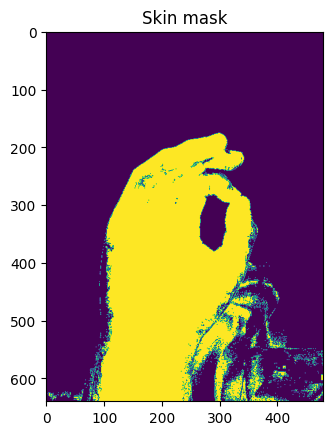

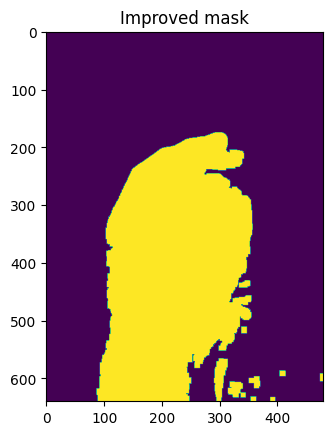

Saving skin mask to data/labels_skin_masks/O.jpg


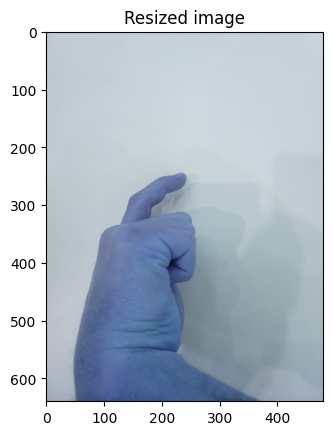

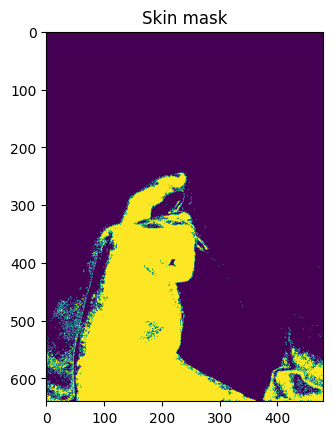

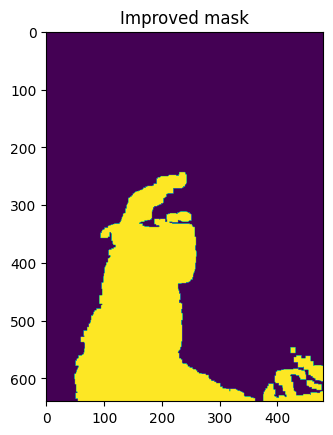

Saving skin mask to data/labels_skin_masks/X.jpg


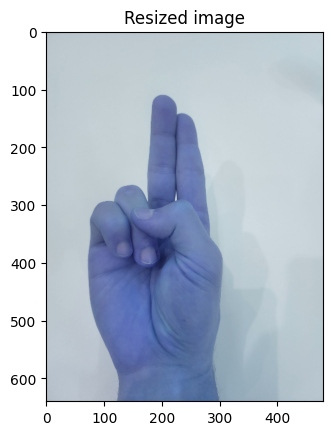

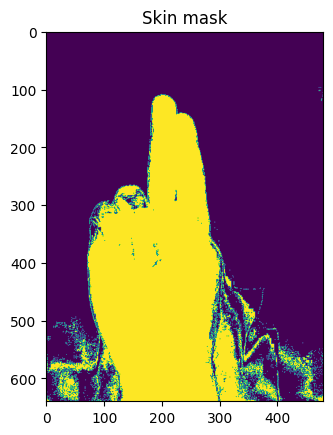

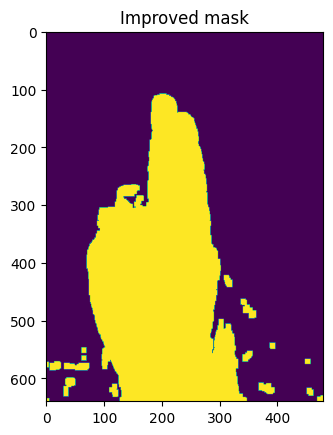

Saving skin mask to data/labels_skin_masks/U.jpg


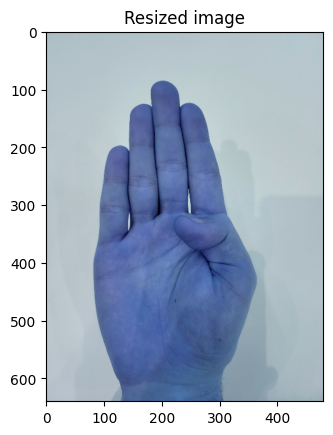

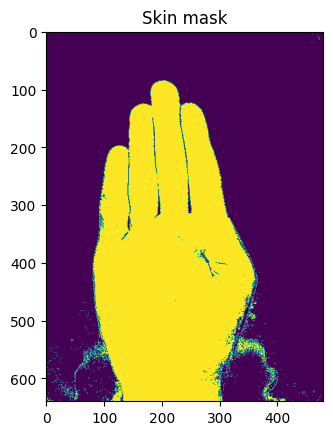

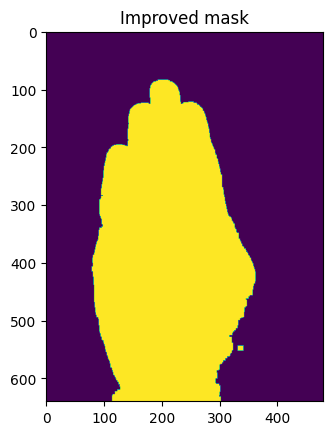

Saving skin mask to data/labels_skin_masks/B.jpg


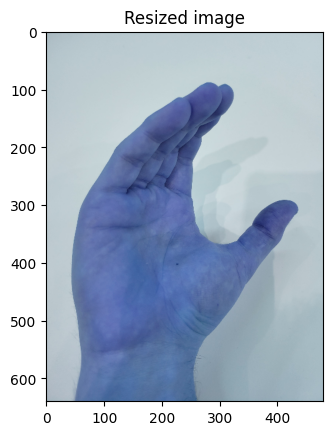

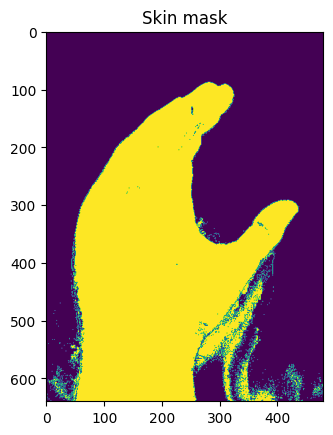

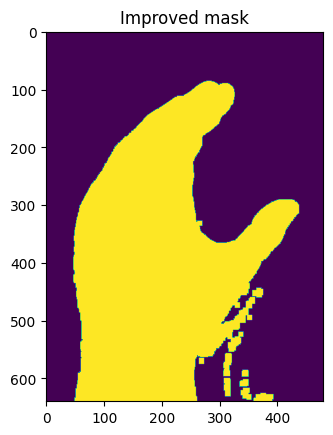

Saving skin mask to data/labels_skin_masks/C.jpg


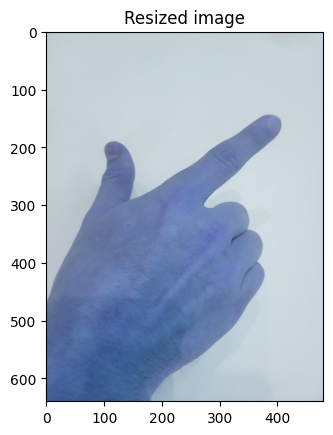

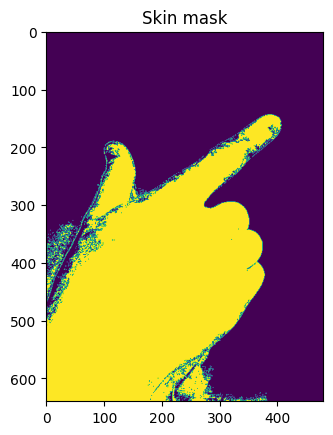

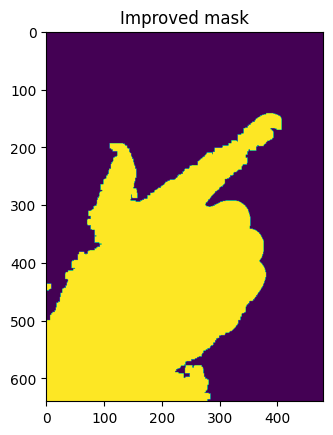

Saving skin mask to data/labels_skin_masks/T.jpg


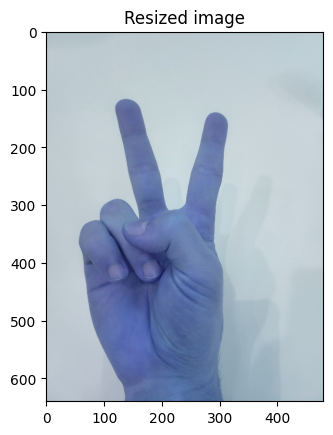

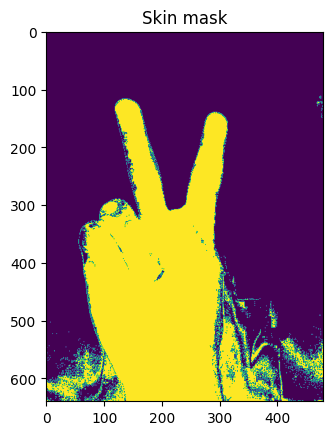

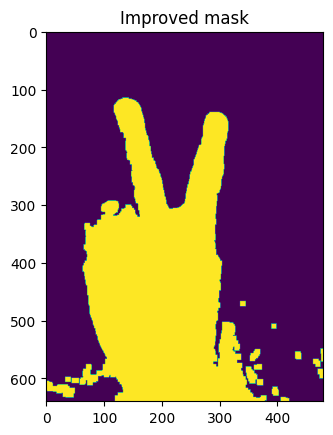

Saving skin mask to data/labels_skin_masks/V.jpg


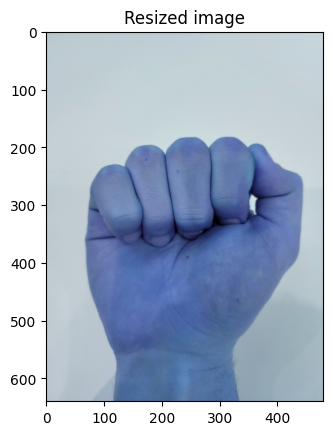

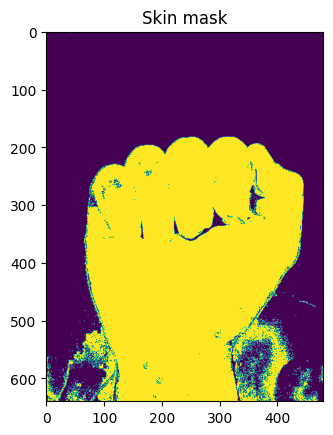

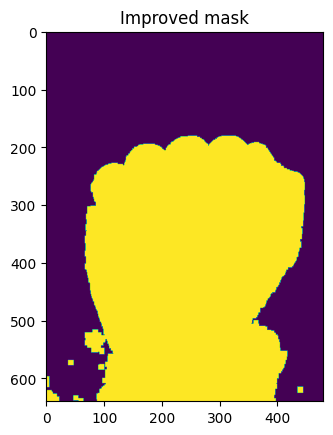

Saving skin mask to data/labels_skin_masks/A.jpg


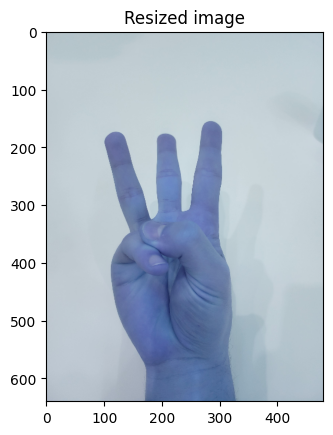

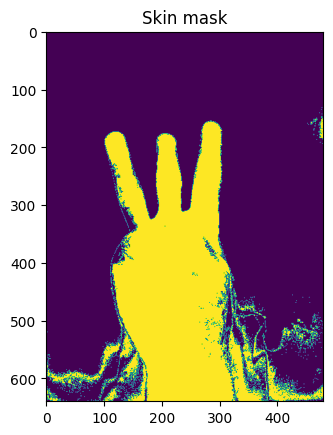

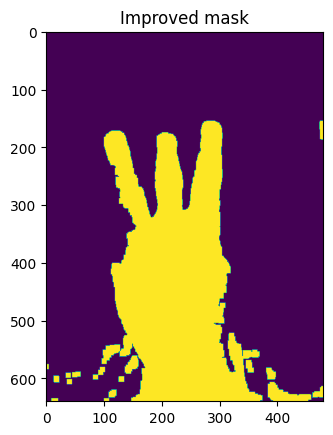

Saving skin mask to data/labels_skin_masks/W.jpg


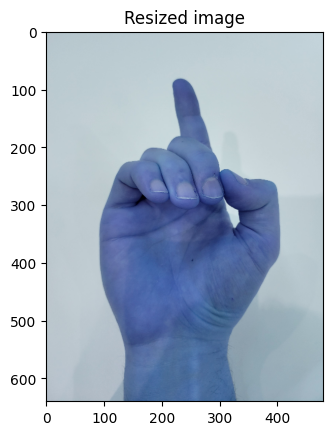

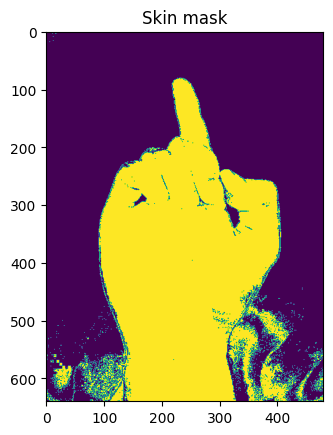

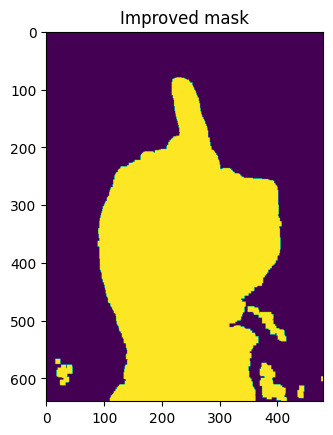

Saving skin mask to data/labels_skin_masks/D.jpg


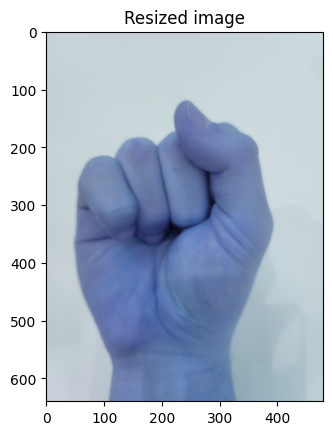

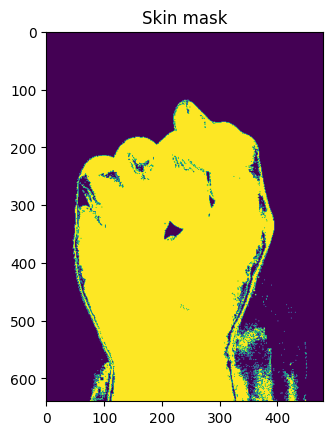

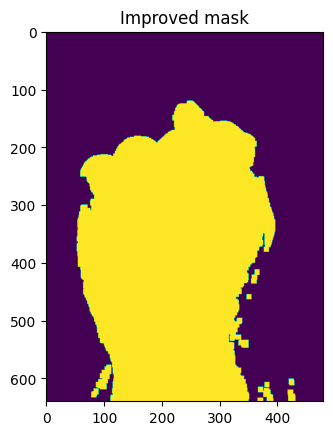

Saving skin mask to data/labels_skin_masks/S.jpg


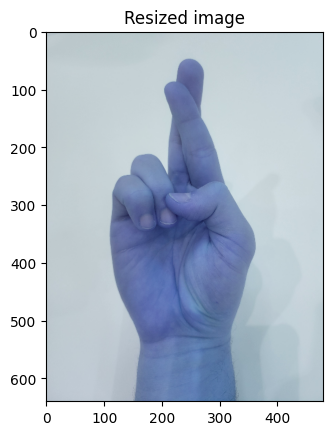

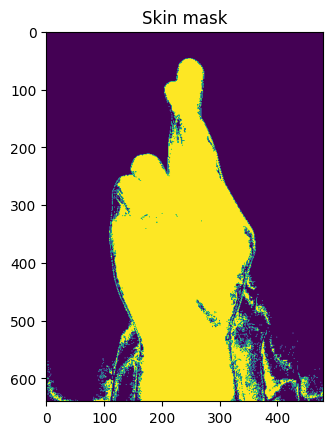

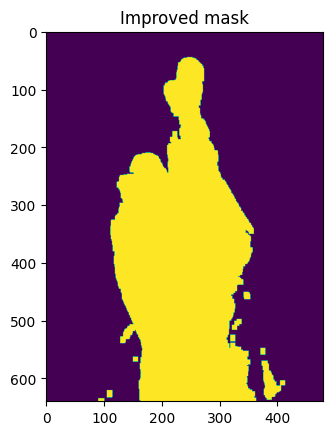

Saving skin mask to data/labels_skin_masks/R.jpg


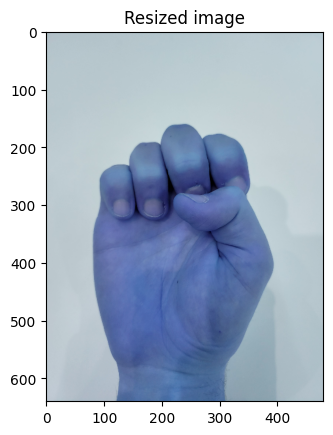

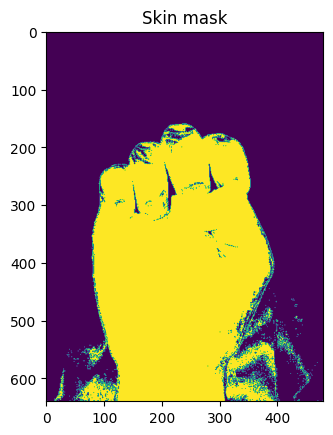

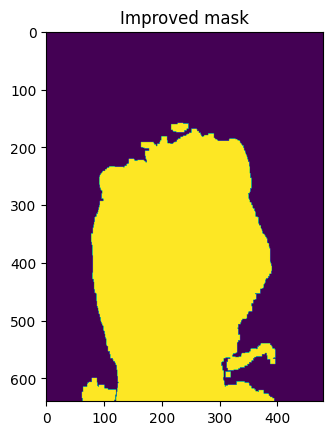

Saving skin mask to data/labels_skin_masks/E.jpg


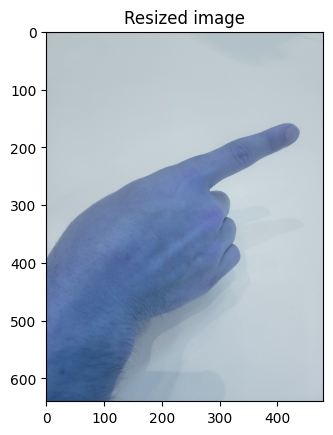

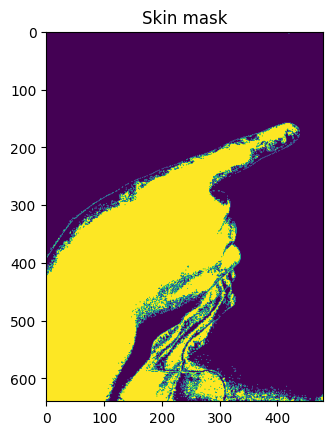

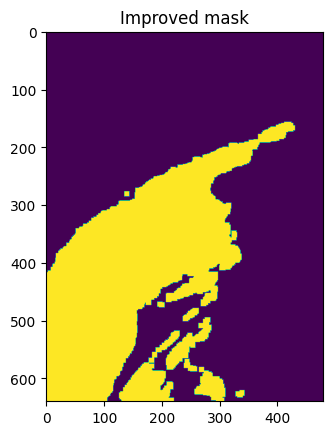

Saving skin mask to data/labels_skin_masks/G.jpg


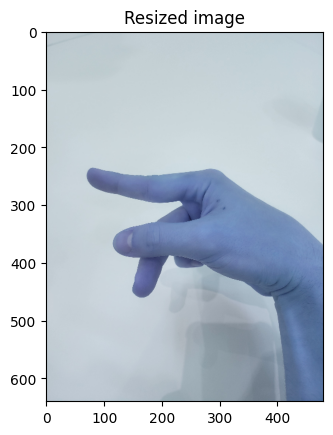

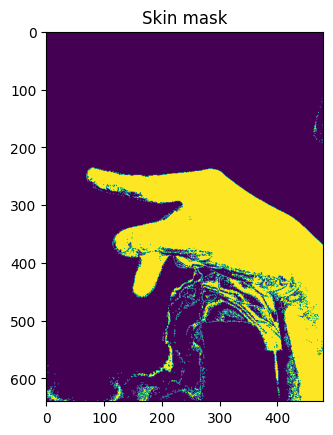

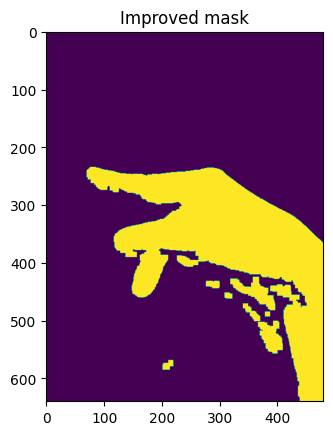

Saving skin mask to data/labels_skin_masks/P.jpg


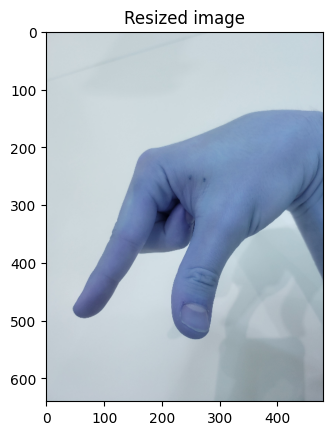

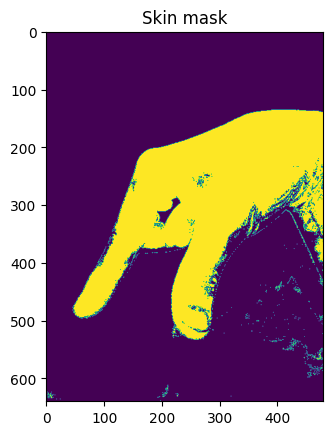

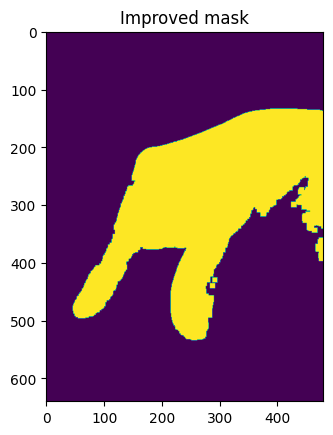

Saving skin mask to data/labels_skin_masks/Q.jpg


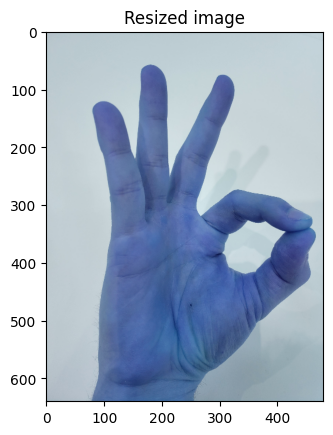

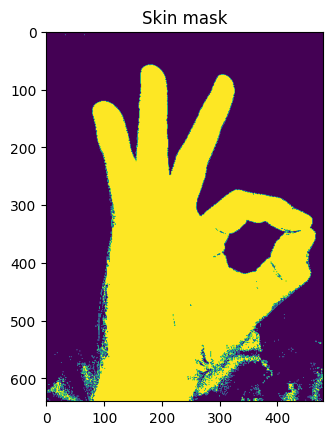

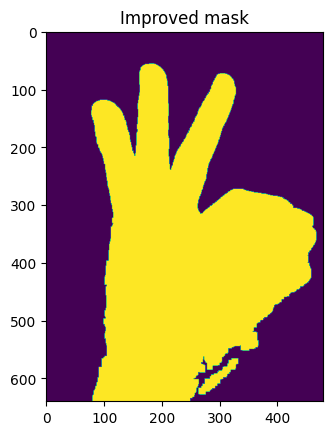

Saving skin mask to data/labels_skin_masks/F.jpg


In [10]:
# Load the label folder in data/labels
label_folder = "data/labels"
label_files = os.listdir(label_folder)

# Create the skin mask for each label and save it in data/labels_skin_masks
for label_file in label_files:
    # Open the image
    label = cv2.imread(os.path.join(label_folder, label_file))
    # Resize the image to a maximum size of 640
    label_resized = resize_to_max(label)
    plt.imshow(label_resized)
    plt.title("Resized image")
    plt.show()
    # Create the skin mask
    skin_mask = createSkinMask(
        label_resized, histogram_file="histogram.plk", color_space="BGR", size=32
    )
    plt.imshow(skin_mask)
    plt.title("Skin mask")
    plt.show()

    # Improve the mask
    # Définir le noyau pour les opérations morphologiques
    kernel = np.ones((5, 5), np.uint8)

    # Opening pour enlever le bruit
    mask_opened = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # Closing pour remplir les trous
    mask_closed = cv2.morphologyEx(mask_opened, cv2.MORPH_CLOSE, kernel)

    # Lissage des bords
    mask_smoothed = cv2.GaussianBlur(mask_closed, (5, 5), 0)

    # Remplissage des trous restants
    # Trouver un point sûr à l'intérieur de la main et appliquer le floodFill
    height, width = mask_smoothed.shape
    mask_floodfill = mask_smoothed.copy()
    cv2.floodFill(
        mask_floodfill, None, (0, 0), 255
    )  # Commencer dans le coin pour trouver l'arrière-plan
    mask_floodfill_inv = cv2.bitwise_not(mask_floodfill)
    mask_filled = mask_smoothed | mask_floodfill_inv

    plt.imshow(mask_filled)
    plt.title("Improved mask")
    plt.show()

    # Save the skin mask
    path_to_save = os.path.join("data/labels_skin_masks", label_file)
    print(f"Saving skin mask to {path_to_save}")
    cv2.imwrite(path_to_save, mask_filled)
    # Save the resized image
    path_to_save = os.path.join("data/labels_resized", label_file)
    cv2.imwrite(path_to_save, label_resized)